In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
def bet(x,f,p=0.6, gamma=1):
    if np.random.random() < p:
        return x + gamma*f*x
    else:
        return x - f*x
    
def autobet(x0=250, f=0.2, p=0.6, t=20, r=10000):
    x_final = []
    for _ in range(r):
        x = x0
        for _ in range(t):
            x = bet(x,f,p)
        x_final.append(x)

    n, bins, patches = plt.hist(x_final, bins=40)

    ci = np.percentile(x_final,[2.5,97.5])

    rect_colors = [plt.cm.jet(100*x) for x in \
                   (np.percentile(x_final,2.5) < bins)&(bins < np.percentile(x_final,97.5)).astype(int)]

    for i,patch in enumerate(patches):
        plt.setp(patch, 'facecolor', rect_colors[i])

    plt.title('f = {}. Confidence interval 95%: {} - {}'.format(f, round(ci[0],2), round(ci[1],2)))
    plt.xlabel('Money left after {} bets'.format(t))
    plt.show()
    
    return x_final

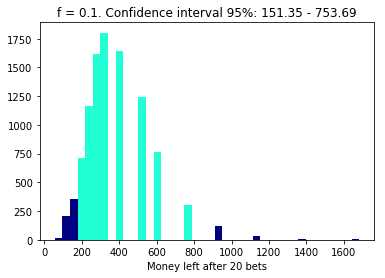

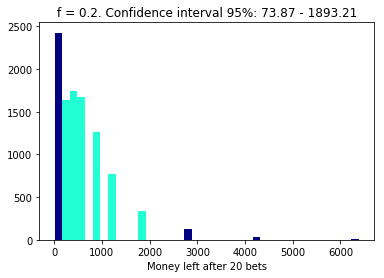

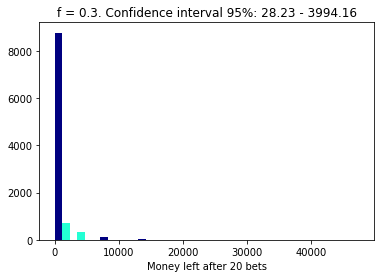

In [305]:
autobet(x0=250, f=0.1, p=0.6, t=20, r=10000)
autobet(x0=250, f=0.2, p=0.6, t=20, r=10000)
autobet(x0=250, f=0.3, p=0.6, t=20, r=10000)